In [1]:
from api_keys import weather_api_key
import json
import requests
import random
import requests
import scipy.stats as st
from citipy import citipy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import time




In [2]:
longitude_list = []
latitude_list = []
city_list = []
dup_city_list = []
dup_cnt = 0
city_cnt = 0

for x in range(10000):
    if city_cnt < 600:
        latitude = round(random.uniform(-90, 90), 2)
        longitude = round(random.uniform(-180, 180), 2)
        city = citipy.nearest_city(latitude, longitude).city_name
        if city not in city_list:
            city_list.append(city)
            city_cnt += 1
            print(city_cnt)
        elif city in city_list:
            dup_city_list.append(city)
            dup_cnt += 1
            print(city_cnt, dup_cnt)
    elif city_cnt == 600:
        break
        
# test for duplicate cities
test_unique_city_df = pd.DataFrame(city_list)
duplicates = test_unique_city_df[test_unique_city_df.duplicated()]     
print(f"Number of duplicates in city_list: {len(duplicates)}")
print(f"Number of duplicates pushed into a separate list: {len(dup_city_list)}")
print(f"Number of cities: {len(city_list)}")
print(city_list)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
21 1
22
23
24
25
26
27
27 2
28
29
30
31
32
33
34
34 3
35
36
37
38
39
39 4
40
41
42
43
44
45
46
47
48
48 5
49
50
51
52
53
53 6
53 7
53 8
54
55
55 9
56
57
57 10
57 11
58
59
59 12
60
60 13
61
62
63
64
64 14
65
65 15
66
67
68
69
69 16
70
71
72
73
74
75
75 17
76
77
78
78 18
78 19
78 20
79
80
81
82
83
83 21
84
85
85 22
86
87
88
89
90
91
92
93
94
94 23
94 24
94 25
95
95 26
96
97
97 27
98
98 28
99
99 29
99 30
99 31
100
100 32
101
102
102 33
102 34
102 35
103
104
104 36
105
106
107
108
109
109 37
110
111
111 38
112
112 39
112 40
112 41
113
113 42
114
115
116
116 43
117
118
118 44
119
119 45
119 46
120
120 47
121
121 48
122
123
123 49
123 50
123 51
124
125
125 52
126
127
128
128 53
128 54
129
129 55
129 56
129 57
130
131
132
133
133 58
133 59
134
134 60
135
135 61
136
136 62
137
137 63
137 64
138
139
140
140 65
141
142
143
144
145
145 66
145 67
146
146 68
147
147 69
147 70
148
148 71
149
149 72
150
151
152
153
153 73
153 74
153 75
153 76
153 

Number of duplicates in city_list: 0
Number of duplicates pushed into a separate list: 799
Number of cities: 600
['busselton', 'vila franca do campo', 'punta arenas', 'sibolga', 'hermanus', 'kamenskoye', 'deputatskiy', 'kavaratti', 'la tuque', 'atuona', 'nishihara', 'hobart', 'waipawa', 'tasiilaq', 'bengkulu', 'mihail kogalniceanu', 'lompoc', 'hofn', 'nagato', 'port alfred', 'elban', 'nizwa', 'ushuaia', 'turtas', 'port hawkesbury', 'vardo', 'qaanaaq', 'bac lieu', 'muros', 'yellowknife', 'port lincoln', 'bredasdorp', 'antalaha', 'mys shmidta', 'derzhavinsk', 'bugama', 'attawapiskat', 'cape town', 'hilo', 'vaitupu', 'blenheim', 'saint-georges', 'rikitea', 'isangel', 'saskylakh', 'isla vista', 'luderitz', 'tamandare', 'saint-joseph', 'avarua', 'kendari', 'namatanai', 'abaete', 'bluff', 'nguiu', 'mahebourg', 'asau', 'tooele', 'novopavlovka', 'lewiston', 'dikson', 'lagoa', 'nizhnyaya tura', 'new norfolk', 'khatanga', 'mollendo', 'belushya guba', 'ketchikan', 'pacific grove', 'tabas', 'balim

In [13]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
# Build partial query URL
temp_list = []
lat_list = []
lng_list = []
hum_list = []
wind_list = []
cloud_list = []
city_list_extended = []
country_list = []
date_list = []
api_cnt = 0
set_cnt = 1

for city in city_list:
    if api_cnt < 50:
        api_cnt += 1
        # add try and except in case query url doesn't exist
        query_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
        weather_response = requests.get(query_url)
        weather_json = weather_response.json()
        
        try:
            #get temp from weather_json
            temp = weather_json["main"]["temp_max"]
            temp_list.append(temp)
        except (KeyError):
            pass
#             temp = -9999999999
#             temp_list.append(temp)
  
        try:
            #get humidity from weather_json
            hum = weather_json["main"]["humidity"]
            hum_list.append(hum)
        except (KeyError):
            pass
#             hum = -9999999999
#             hum_list.append(hum)
    
        try:
            #get windspeed from weather_json
            wind_speed = weather_json["wind"]["speed"]
            wind_list.append(wind_speed)
        except (KeyError):
            pass
#             wind_speed = -9999999999
#             wind_list.append(wind_speed)
            
        try:
            #get cloudiness from weather_json
            cloudiness = weather_json["clouds"]["all"]
            cloud_list.append(cloudiness)            
        except:
            pass
            #get cloudiness from weather_json
#             cloudiness = -9999999999
#             cloud_list.append(cloudiness)
    
        try:
            #get latitude from weather_json
            latitude = weather_json["coord"]["lat"]
            lat_list.append(latitude)
        except:
            pass
#             latitude = -9999999999
#             lat_list.append(latitude)
            
        try:
            #get longitude from weather_json
            longitude = weather_json["coord"]["lon"]
            lng_list.append(longitude)
        except:
            pass
#             longitude = -9999999999
#             lng_list.append(longitude)
        
        try:
            #get country from weather_json
            country = weather_json["sys"]["country"]
            country_list.append(country)
        except:
            pass
#             country = ""
#             country_list.append(country)

        try:
            #get date from weather_json
            date = weather_json["dt"]
            date_list.append(date)
        except:
            pass
#             country = ""
#             country_list.append(country)
      
        city_list_extended = [city_list, temp_list, hum_list, wind_list, cloud_list, lat_list, lng_list, country_list, date_list]
        
        print(f"Processing record {api_cnt} of Set {set_cnt}, City Name: {city}")
    
    elif api_cnt == 50:
        api_cnt = 0
        set_cnt += 1
        time.sleep(60)
        
city_df = pd.DataFrame(city_list_extended).transpose().rename(columns = {0: "City", 1: "Max Temperature", 2: "Humidity", 3: "Wind Speed", 4: "Cloudiness", 5: "Latitude", 6: "Longitude", 7: "Country", 8: "Date"})


Processing record 1 of Set 1, City Name: busselton
Processing record 2 of Set 1, City Name: vila franca do campo
Processing record 3 of Set 1, City Name: punta arenas
Processing record 4 of Set 1, City Name: sibolga
Processing record 5 of Set 1, City Name: hermanus
Processing record 6 of Set 1, City Name: kamenskoye
Processing record 7 of Set 1, City Name: deputatskiy
Processing record 8 of Set 1, City Name: kavaratti
Processing record 9 of Set 1, City Name: la tuque
Processing record 10 of Set 1, City Name: atuona
Processing record 11 of Set 1, City Name: nishihara
Processing record 12 of Set 1, City Name: hobart
Processing record 13 of Set 1, City Name: waipawa
Processing record 14 of Set 1, City Name: tasiilaq
Processing record 15 of Set 1, City Name: bengkulu
Processing record 16 of Set 1, City Name: mihail kogalniceanu
Processing record 17 of Set 1, City Name: lompoc
Processing record 18 of Set 1, City Name: hofn
Processing record 19 of Set 1, City Name: nagato
Processing record 2

Processing record 12 of Set 4, City Name: clyde river
Processing record 13 of Set 4, City Name: nunkini
Processing record 14 of Set 4, City Name: pandan niog
Processing record 15 of Set 4, City Name: castro
Processing record 16 of Set 4, City Name: arman
Processing record 17 of Set 4, City Name: arraial do cabo
Processing record 18 of Set 4, City Name: umm kaddadah
Processing record 19 of Set 4, City Name: chesapeake
Processing record 20 of Set 4, City Name: atar
Processing record 21 of Set 4, City Name: grindavik
Processing record 22 of Set 4, City Name: bandarbeyla
Processing record 23 of Set 4, City Name: beringovskiy
Processing record 24 of Set 4, City Name: weinan
Processing record 25 of Set 4, City Name: synya
Processing record 26 of Set 4, City Name: pomabamba
Processing record 27 of Set 4, City Name: alofi
Processing record 28 of Set 4, City Name: tsihombe
Processing record 29 of Set 4, City Name: privolzhye
Processing record 30 of Set 4, City Name: carutapera
Processing record

Processing record 22 of Set 7, City Name: jinxiang
Processing record 23 of Set 7, City Name: kegayli
Processing record 24 of Set 7, City Name: cabo san lucas
Processing record 25 of Set 7, City Name: georgetown
Processing record 26 of Set 7, City Name: brae
Processing record 27 of Set 7, City Name: nurota
Processing record 28 of Set 7, City Name: kui buri
Processing record 29 of Set 7, City Name: wanning
Processing record 30 of Set 7, City Name: amarpur
Processing record 31 of Set 7, City Name: zinder
Processing record 32 of Set 7, City Name: marsh harbour
Processing record 33 of Set 7, City Name: qaqortoq
Processing record 34 of Set 7, City Name: paradwip
Processing record 35 of Set 7, City Name: ponta delgada
Processing record 36 of Set 7, City Name: shimoda
Processing record 37 of Set 7, City Name: jilib
Processing record 38 of Set 7, City Name: selma
Processing record 39 of Set 7, City Name: krasnoye
Processing record 40 of Set 7, City Name: makakilo city
Processing record 41 of Se

Processing record 32 of Set 10, City Name: geraldton
Processing record 33 of Set 10, City Name: kirensk
Processing record 34 of Set 10, City Name: balkhash
Processing record 35 of Set 10, City Name: manado
Processing record 36 of Set 10, City Name: saldanha
Processing record 37 of Set 10, City Name: lakatoro
Processing record 38 of Set 10, City Name: alyangula
Processing record 39 of Set 10, City Name: port hardy
Processing record 40 of Set 10, City Name: hasanabad
Processing record 41 of Set 10, City Name: byron bay
Processing record 42 of Set 10, City Name: sao jose da coroa grande
Processing record 43 of Set 10, City Name: the valley
Processing record 44 of Set 10, City Name: manggar
Processing record 45 of Set 10, City Name: kloulklubed
Processing record 46 of Set 10, City Name: pahalgam
Processing record 47 of Set 10, City Name: morganton
Processing record 48 of Set 10, City Name: tongsa
Processing record 49 of Set 10, City Name: mangan
Processing record 50 of Set 10, City Name: s

In [14]:
def convert_to_float(df,column_name):
    df[column_name] = df[column_name].astype(float)
    return df[column_name]

convert_to_float(city_df,"Max Temperature")
convert_to_float(city_df,"Humidity")
convert_to_float(city_df,"Wind Speed")
convert_to_float(city_df,"Cloudiness")
convert_to_float(city_df,"Latitude")
convert_to_float(city_df,"Longitude")

city_df.to_csv("city.csv", encoding = "utf-8", index = False, header = True)
city_df.describe()

,Max Temperature,Humidity,Wind Speed,Cloudiness,Latitude,Longitude
count,543.000000,543.000000,543.000000,543.000000,543.000000,543.000000
mean,9.366243,75.633517,3.305304,60.788214,20.961731,18.954880
std,17.152550,18.730565,2.511090,39.576696,33.115393,92.558404
min,-36.500000,20.000000,0.000000,0.000000,-54.800000,-179.166700
25%,-2.795000,67.000000,1.540000,18.500000,-6.266550,-64.600150
50%,14.600000,79.000000,2.750000,75.000000,25.021300,26.687600
75%,23.750000,91.000000,4.370000,100.000000,49.608300,102.307750
max,35.840000,100.000000,16.240000,100.000000,78.218600,179.316700


In [15]:
city_hum_p100 = city_df.loc[city_df["Humidity"] >= 100, :]
print(f"Number of cities with humidty > 100: {len(city_hum_p100)}")
city_hum_p100

Number of cities with humidty > 100: 9


,City,Max Temperature,Humidity,Wind Speed,Cloudiness,Latitude,Longitude,Country,Date
183,severo-yeniseyskiy,5.51,100.0,3.60,0.0,40.5982,-124.1573,US,1643345273
209,northam,6.04,100.0,0.00,0.0,43.4065,-124.2243,US,1643345282
222,hamilton,-8.18,100.0,1.20,99.0,62.2057,34.2614,RU,1643345286
264,aban,-16.18,100.0,1.05,99.0,54.4815,53.4710,RU,1643345360
290,hasaki,24.95,100.0,0.00,40.0,4.0483,9.7043,CM,1643345428
399,dawei,9.11,100.0,5.35,100.0,31.6100,34.7642,IL,1643345584
475,mehamn,3.02,100.0,0.00,25.0,49.5833,0.3333,FR,1643345727
485,xining,-10.83,100.0,1.74,97.0,47.9563,39.7384,UA,1643345730
517,westport,-20.78,100.0,1.31,85.0,62.5147,65.8878,RU,1643345799


In [16]:
city_df = city_df.loc[city_df["Humidity"] < 100, :]
clean_city_data = city_df.dropna(how = "any", inplace = False)
print(f"Number of cities with humidity < 100: {len(city_df)}")
print(f"Number of cities after null removal: {len(clean_city_data)}")
clean_city_data.describe()

Number of cities with humidity < 100: 534
Number of cities after null removal: 534


,Max Temperature,Humidity,Wind Speed,Cloudiness,Latitude,Longitude
count,534.000000,534.000000,534.000000,534.000000,534.000000,534.000000
mean,9.537846,75.222846,3.334326,60.792135,20.572688,19.293485
std,17.155059,18.616223,2.512326,39.544402,33.183334,92.875276
min,-36.500000,20.000000,0.000000,0.000000,-54.800000,-179.166700
25%,-2.687500,67.000000,1.540000,18.250000,-6.788700,-64.809675
50%,14.760000,79.000000,2.785000,75.000000,24.303350,26.594750
75%,23.827500,90.000000,4.402500,100.000000,49.457375,102.527825
max,35.840000,99.000000,16.240000,100.000000,78.218600,179.316700


In [17]:
clean_city_north_data = clean_city_data.loc[clean_city_data["Latitude"] >= 0, :]
min_north = clean_city_north_data["Latitude"].min()
print(f"Northern Hemisphere test, min latitude: {min_north}")

clean_city_south_data = clean_city_data.loc[clean_city_data["Latitude"] < 0, :]
max_south = clean_city_south_data["Latitude"].max()
print(f"Southern Hemisphere test, max latitude: {max_south}")


Northern Hemisphere test, min latitude: 0.15
Southern Hemisphere test, max latitude: -0.0333


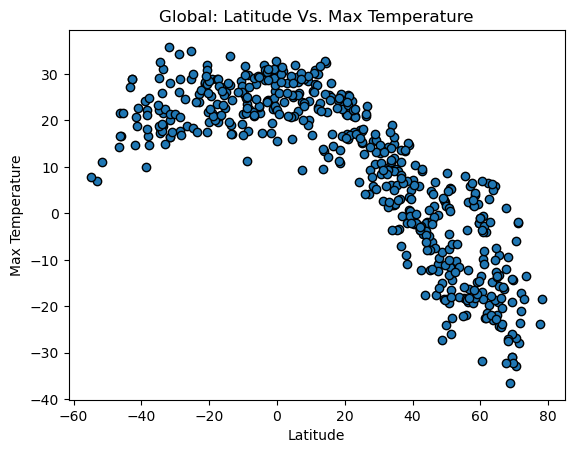

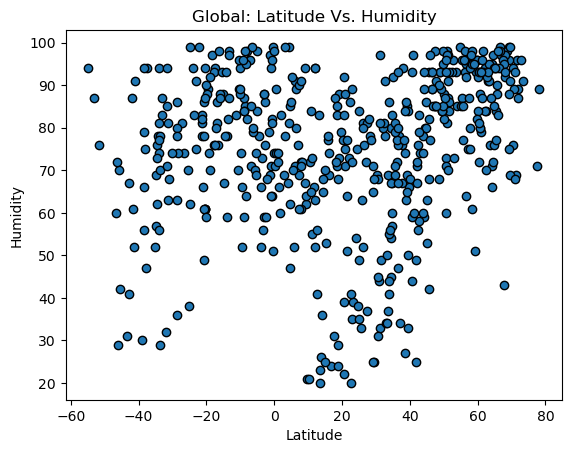

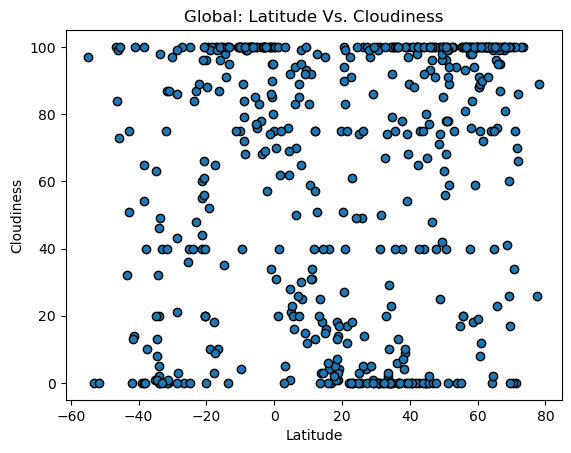

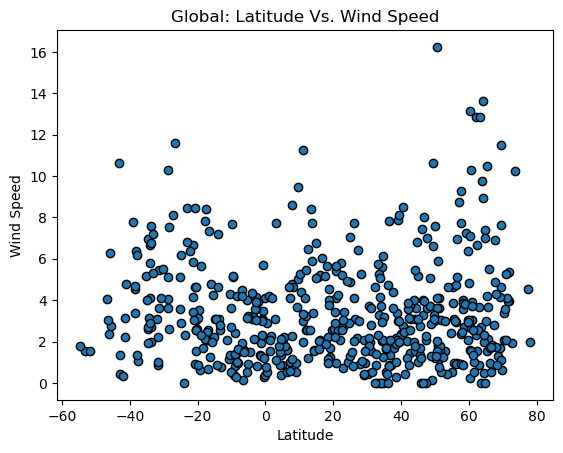

In [18]:
plot_list = ["Max Temperature", "Humidity", "Cloudiness", "Wind Speed"]
x_axis = "Latitude"


for plot in plot_list:
    plt.scatter(clean_city_data[x_axis], clean_city_data[plot], edgecolor = "black")
    plt.title(f"Global: {x_axis} Vs. {plot}")
    plt.xlabel(f"{x_axis}")
    plt.ylabel(f"{plot}")
    plt.savefig(f"Global {x_axis} Vs. {plot}.png")
    plt.show()

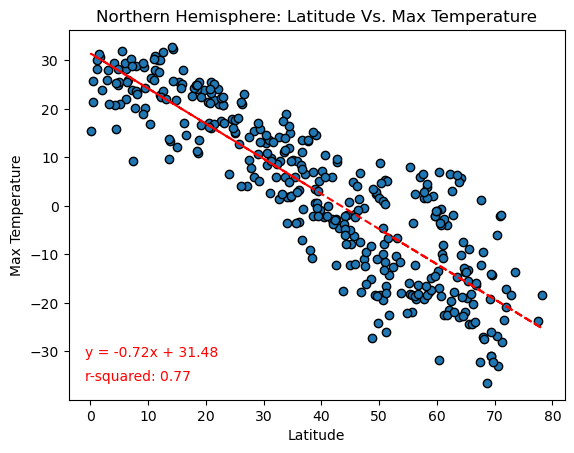

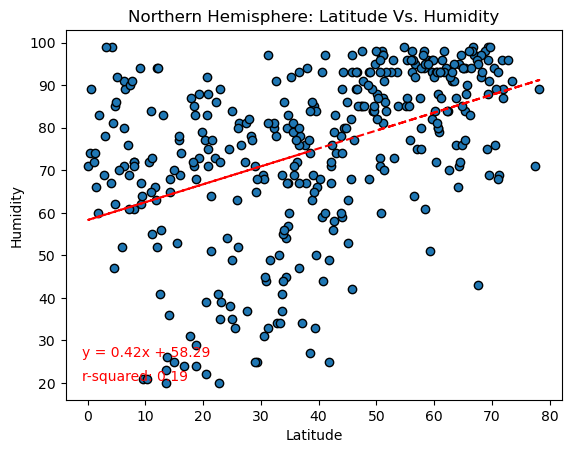

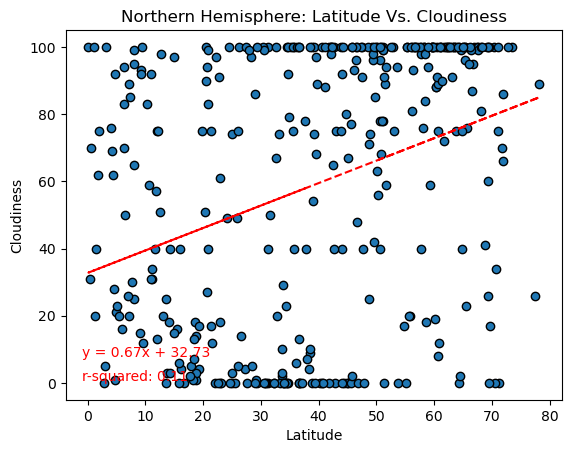

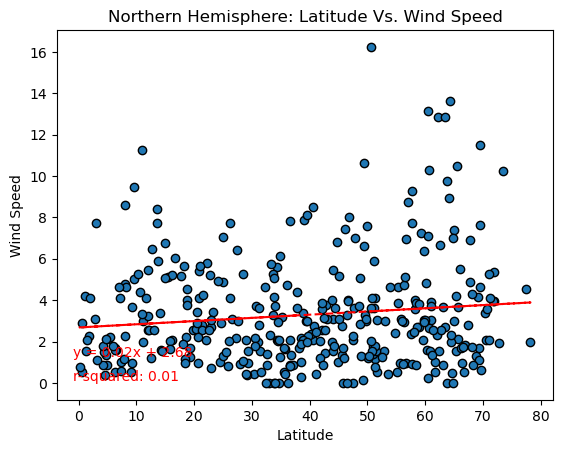

In [19]:
plot_list = ["Max Temperature", "Humidity", "Cloudiness", "Wind Speed"]
x_axis = "Latitude"


for plot in plot_list:
    plt.scatter(clean_city_north_data[x_axis], clean_city_north_data[plot], edgecolor = "black")
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(clean_city_north_data[x_axis], clean_city_north_data[plot])
    regress_values = intercept + slope*clean_city_north_data[x_axis]
    line_eq = f"y = {str(round(slope, 2))}x + {round(intercept, 2)}"
    plt.plot(clean_city_north_data[x_axis], regress_values, "r--")
    r_squared_value = f"r-squared: {round(rvalue**2, 2)}"
    plt.title(f"Northern Hemisphere: {x_axis} Vs. {plot}")
    plt.xlabel(f"{x_axis}")
    plt.ylabel(f"{plot}")
    plt.figtext(.15, .2, line_eq, color = "r")
    plt.figtext(.15, .15, r_squared_value, color = "r")
    plt.savefig(f"Northern Hemisphere {x_axis} Vs. {plot}.png")
    plt.show()

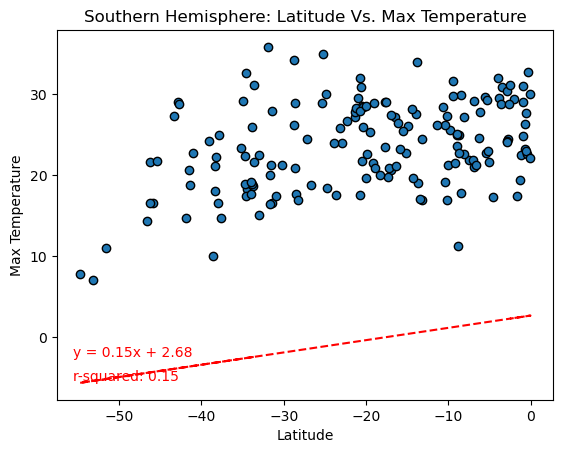

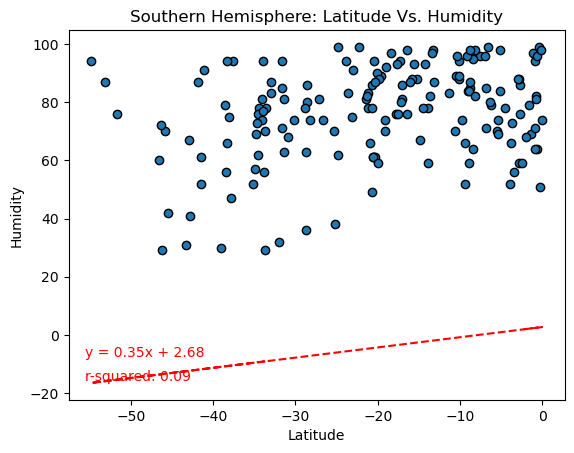

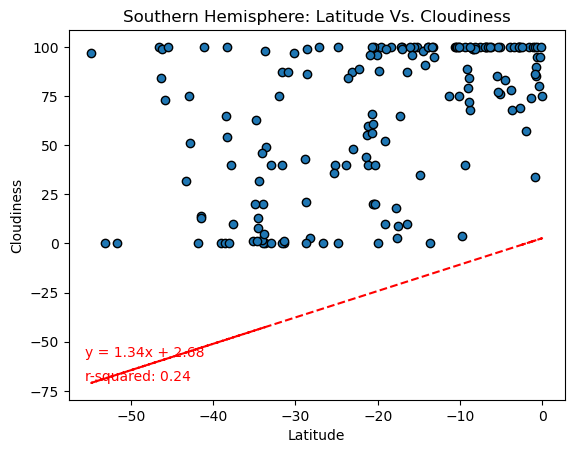

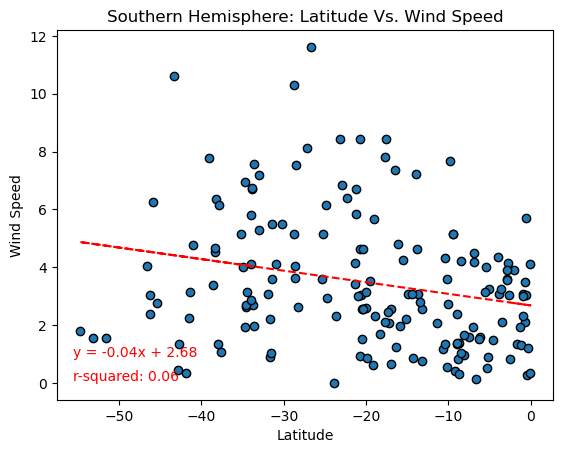

In [20]:
plot_list = ["Max Temperature", "Humidity", "Cloudiness", "Wind Speed"]
x_axis = "Latitude"


for plot in plot_list:
    plt.scatter(clean_city_south_data[x_axis], clean_city_south_data[plot], edgecolor = "black")
    (slope, intecept, rvalue, pvalue, stderr) = st.linregress(clean_city_south_data[x_axis], clean_city_south_data[plot])
    regress_values = intercept + clean_city_south_data[x_axis]*slope
    line_eq = f"y = {round(slope, 2)}x + {round(intercept, 2)}"
    plt.plot(clean_city_south_data[x_axis], regress_values, "r--")
    r_squared_value = f"r-squared: {round(rvalue**2, 2)}"
    plt.figtext(.15, .2, line_eq, color = "r")
    plt.figtext(.15, .15, r_squared_value, color = "r")
    plt.title(f"Southern Hemisphere: {x_axis} Vs. {plot}")
    plt.xlabel(f"{x_axis}")
    plt.ylabel(f"{plot}")
    plt.savefig(f"Southern Hemisphere {x_axis} Vs. {plot}.png")
    plt.show()

In [11]:
# df_list = [clean_city_north_data, clean_city_south_data]

# for df in df_list:
#     for plot in plot_list:
#         if f"{df}" == "clean_city_north_data":
#             plt.scatter(df[x_axis], df[plot], edgecolor = "black")
#             plt.title(f"Northern Hemisphere: {x_axis} Vs. {plot}")
#             plt.show()
#         elif f"{df}" == "clean_city_south_data":
#             plt.scatter(df[x_axis], df[plot], edgecolor = "black")
#             plt.title(f"Southern Hemisphere: {x_axis} Vs. {plot}")
#             plt.show()    

In [12]:
# #get weather response
# weather_response = requests.get(query_url)
# weather_json = weather_response.json()
# weather_json


